In [51]:
# Import library dan dataset
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Baca dataset
print("Loading dataset...")
df = pd.read_excel('dataset laptop asus.xlsx')
print("\nContoh data laptop:")
print(df.head())

Loading dataset...

Contoh data laptop:
   No                Model     Prosesor    RAM Penyimpanan  \
0   1     ASUS VivoBook 14     Intel i3   4 GB  256 GB SSD   
1   2      ASUS ZenBook 13     Intel i5   8 GB  512 GB SSD   
2   3   ASUS ROG Strix G15     Intel i7  16 GB    1 TB SSD   
3   4     ASUS VivoBook 15     Intel i5   8 GB  512 GB SSD   
4   5  ASUS TUF Gaming A15  AMD Ryzen 5   8 GB  512 GB SSD   

         Kartu Grafis Ukuran Layar Harga (IDR)         Tujuan Penggunaan  \
0       Intel UHD 620      14" FHD   6,000,000  Kuliah, Pekerjaan Ringan   
1       Intel Iris Xe    13.3" FHD  14,000,000   Profesional, Multimedia   
2  NVIDIA GTX 1660 Ti    15.6" FHD  18,500,000     Gaming, Editing Video   
3       Intel UHD 620    15.6" FHD  10,000,000        Kuliah, Multimedia   
4     NVIDIA GTX 1650    15.6" FHD  12,000,000     Gaming, Editing Video   

  Portabilitas Baterai  Tahun Rilis  
0       Ringan   6 jam         2020  
1       Ringan   8 jam         2020  
2        Berat  

C:\Users\andia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 1000x500 with 0 Axes>

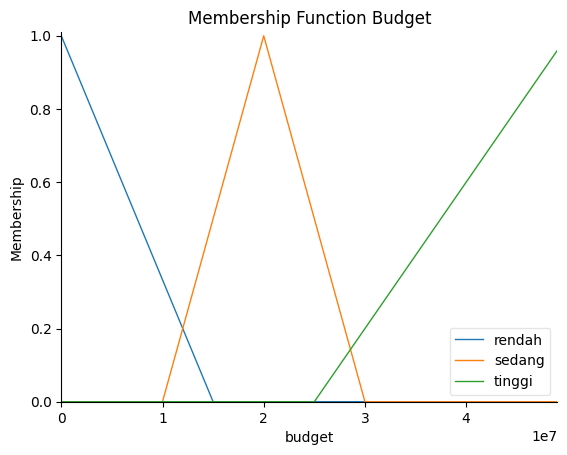

In [52]:
# Membuat variabel fuzzy
budget = ctrl.Antecedent(np.arange(0, 50000000, 1000000), 'budget')
performa = ctrl.Antecedent(np.arange(0, 10, 1), 'performa')
ukuran_layar = ctrl.Antecedent(np.arange(11, 18, 0.1), 'ukuran_layar')
rekomendasi = ctrl.Consequent(np.arange(0, 100, 1), 'rekomendasi')

# Membership function untuk budget
budget['rendah'] = fuzz.trimf(budget.universe, [0, 0, 15000000])
budget['sedang'] = fuzz.trimf(budget.universe, [10000000, 20000000, 30000000])
budget['tinggi'] = fuzz.trimf(budget.universe, [25000000, 50000000, 50000000])

plt.figure(figsize=(10, 5))
budget.view()
plt.title('Membership Function Budget')
plt.show()

<Figure size 1000x500 with 0 Axes>

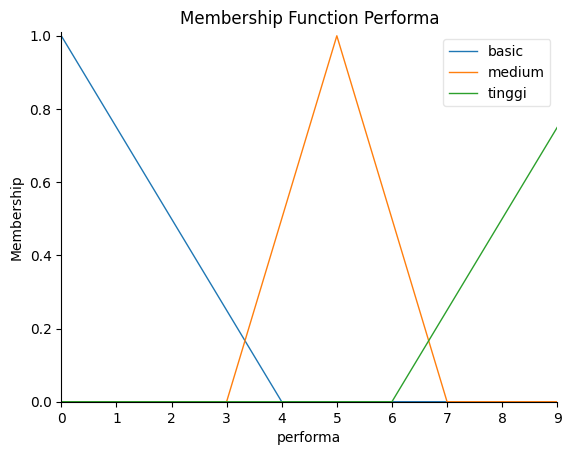

In [53]:
# Membership function untuk performa
performa['basic'] = fuzz.trimf(performa.universe, [0, 0, 4])
performa['medium'] = fuzz.trimf(performa.universe, [3, 5, 7])
performa['tinggi'] = fuzz.trimf(performa.universe, [6, 10, 10])

plt.figure(figsize=(10, 5))
performa.view()
plt.title('Membership Function Performa')
plt.show()

<Figure size 1000x500 with 0 Axes>

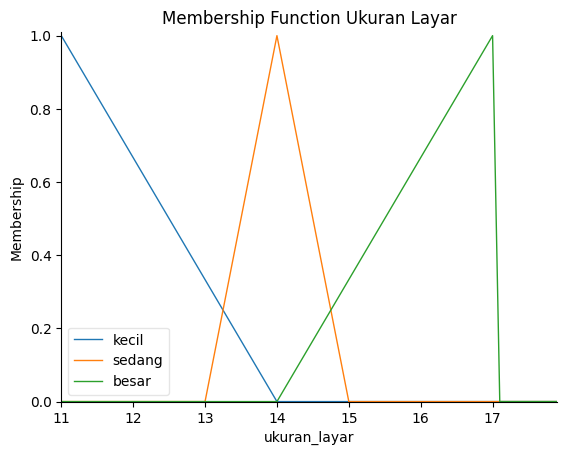

In [54]:
ukuran_layar['kecil'] = fuzz.trimf(ukuran_layar.universe, [11, 11, 14])
ukuran_layar['sedang'] = fuzz.trimf(ukuran_layar.universe, [13, 14, 15])
ukuran_layar['besar'] = fuzz.trimf(ukuran_layar.universe, [14, 17, 17])

plt.figure(figsize=(10, 5))
ukuran_layar.view()
plt.title('Membership Function Ukuran Layar')
plt.show()

<Figure size 1000x500 with 0 Axes>

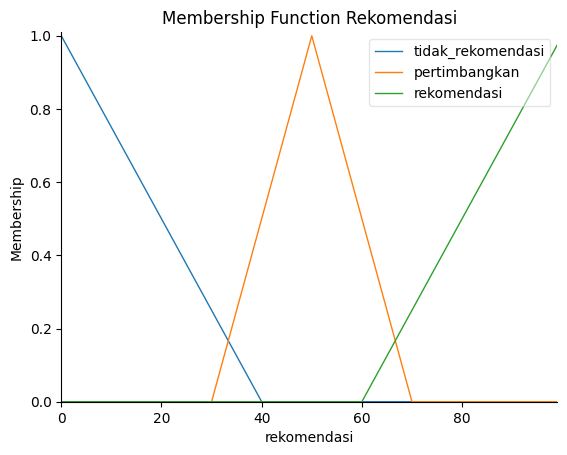

In [55]:
# Membership function untuk rekomendasi
rekomendasi['tidak_rekomendasi'] = fuzz.trimf(rekomendasi.universe, [0, 0, 40])
rekomendasi['pertimbangkan'] = fuzz.trimf(rekomendasi.universe, [30, 50, 70])
rekomendasi['rekomendasi'] = fuzz.trimf(rekomendasi.universe, [60, 100, 100])

plt.figure(figsize=(10, 5))
rekomendasi.view()
plt.title('Membership Function Rekomendasi')
plt.show()

In [56]:
# Membuat aturan fuzzy
print("\nMembuat aturan fuzzy...")

# Aturan untuk budget rendah
rule1 = ctrl.Rule(budget['rendah'] & performa['basic'] & ukuran_layar['kecil'], rekomendasi['rekomendasi'])
rule2 = ctrl.Rule(budget['rendah'] & performa['basic'] & ukuran_layar['sedang'], rekomendasi['pertimbangkan'])
rule3 = ctrl.Rule(budget['rendah'] & performa['medium'] & ukuran_layar['kecil'], rekomendasi['pertimbangkan'])

# Aturan untuk budget sedang
rule4 = ctrl.Rule(budget['sedang'] & performa['medium'] & ukuran_layar['sedang'], rekomendasi['rekomendasi'])
rule5 = ctrl.Rule(budget['sedang'] & performa['tinggi'] & ukuran_layar['sedang'], rekomendasi['rekomendasi'])
rule6 = ctrl.Rule(budget['sedang'] & performa['medium'] & ukuran_layar['besar'], rekomendasi['pertimbangkan'])

# Aturan untuk budget tinggi
rule7 = ctrl.Rule(budget['tinggi'] & performa['tinggi'] & ukuran_layar['besar'], rekomendasi['rekomendasi'])
rule8 = ctrl.Rule(budget['tinggi'] & performa['tinggi'] & ukuran_layar['sedang'], rekomendasi['rekomendasi'])
rule9 = ctrl.Rule(budget['tinggi'] & performa['medium'] & ukuran_layar['besar'], rekomendasi['pertimbangkan'])

# Sistem kontrol dengan semua aturan
sistem_kontrol = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
sistem = ctrl.ControlSystemSimulation(sistem_kontrol)


Membuat aturan fuzzy...


In [57]:
def get_rekomendasi(budget_input, performa_input, layar_input):
    sistem.input['budget'] = budget_input
    sistem.input['performa'] = performa_input
    sistem.input['ukuran_layar'] = layar_input
    
    try:
        sistem.compute()
        return sistem.output['rekomendasi']
    except:
        return 0

# Input dari pengguna
print("=== Sistem Pakar Rekomendasi Laptop ASUS ===")
budget_input = float(input("Masukkan budget (dalam rupiah): "))
performa_input = float(input("Masukkan kebutuhan performa (0-10): "))
layar_input = float(input("Masukkan ukuran layar yang diinginkan (11-17 inch): "))

hasil = get_rekomendasi(budget_input, performa_input, layar_input)
print(f"\nNilai rekomendasi: {hasil:.2f}")

if hasil >= 60:
    print("Status: Sangat Direkomendasikan")
    print("\nKriteria pencarian:")
    print(f"- Budget: Rp {budget_input:,.0f}")
    print(f"- Performa: {performa_input}")
    print(f"- Ukuran Layar: {layar_input} inch")
elif hasil >= 40:
    print("Status: Pertimbangkan")
else:
    print("Status: Tidak Direkomendasikan")

=== Sistem Pakar Rekomendasi Laptop ASUS ===

Nilai rekomendasi: 83.16
Status: Sangat Direkomendasikan

Kriteria pencarian:
- Budget: Rp 35,000,000
- Performa: 10.0
- Ukuran Layar: 17.0 inch


In [58]:
print("Kolom-kolom dalam dataset:")
print(df.columns.tolist())
print("\nContoh 5 data pertama:")
print(df.head())

Kolom-kolom dalam dataset:
['No', 'Model', 'Prosesor', 'RAM', 'Penyimpanan', 'Kartu Grafis', 'Ukuran Layar', 'Harga (IDR)', 'Tujuan Penggunaan', 'Portabilitas', 'Baterai', 'Tahun Rilis']

Contoh 5 data pertama:
   No                Model     Prosesor    RAM Penyimpanan  \
0   1     ASUS VivoBook 14     Intel i3   4 GB  256 GB SSD   
1   2      ASUS ZenBook 13     Intel i5   8 GB  512 GB SSD   
2   3   ASUS ROG Strix G15     Intel i7  16 GB    1 TB SSD   
3   4     ASUS VivoBook 15     Intel i5   8 GB  512 GB SSD   
4   5  ASUS TUF Gaming A15  AMD Ryzen 5   8 GB  512 GB SSD   

         Kartu Grafis Ukuran Layar Harga (IDR)         Tujuan Penggunaan  \
0       Intel UHD 620      14" FHD   6,000,000  Kuliah, Pekerjaan Ringan   
1       Intel Iris Xe    13.3" FHD  14,000,000   Profesional, Multimedia   
2  NVIDIA GTX 1660 Ti    15.6" FHD  18,500,000     Gaming, Editing Video   
3       Intel UHD 620    15.6" FHD  10,000,000        Kuliah, Multimedia   
4     NVIDIA GTX 1650    15.6" FHD  